In [1]:
#PROBLEM STATEMENT => To create a website and a mobile app based on CNN and deep learning which identifies the disease in plants from their images.

In [2]:
#importing dependencies
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVil",
    shuffle = True,
    image_size= (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    )


Found 5172 files belonging to 3 classes.


In [5]:
#DATA EXPLORATION

In [6]:
class_names = dataset.class_names
class_names

['Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
len(dataset)

162

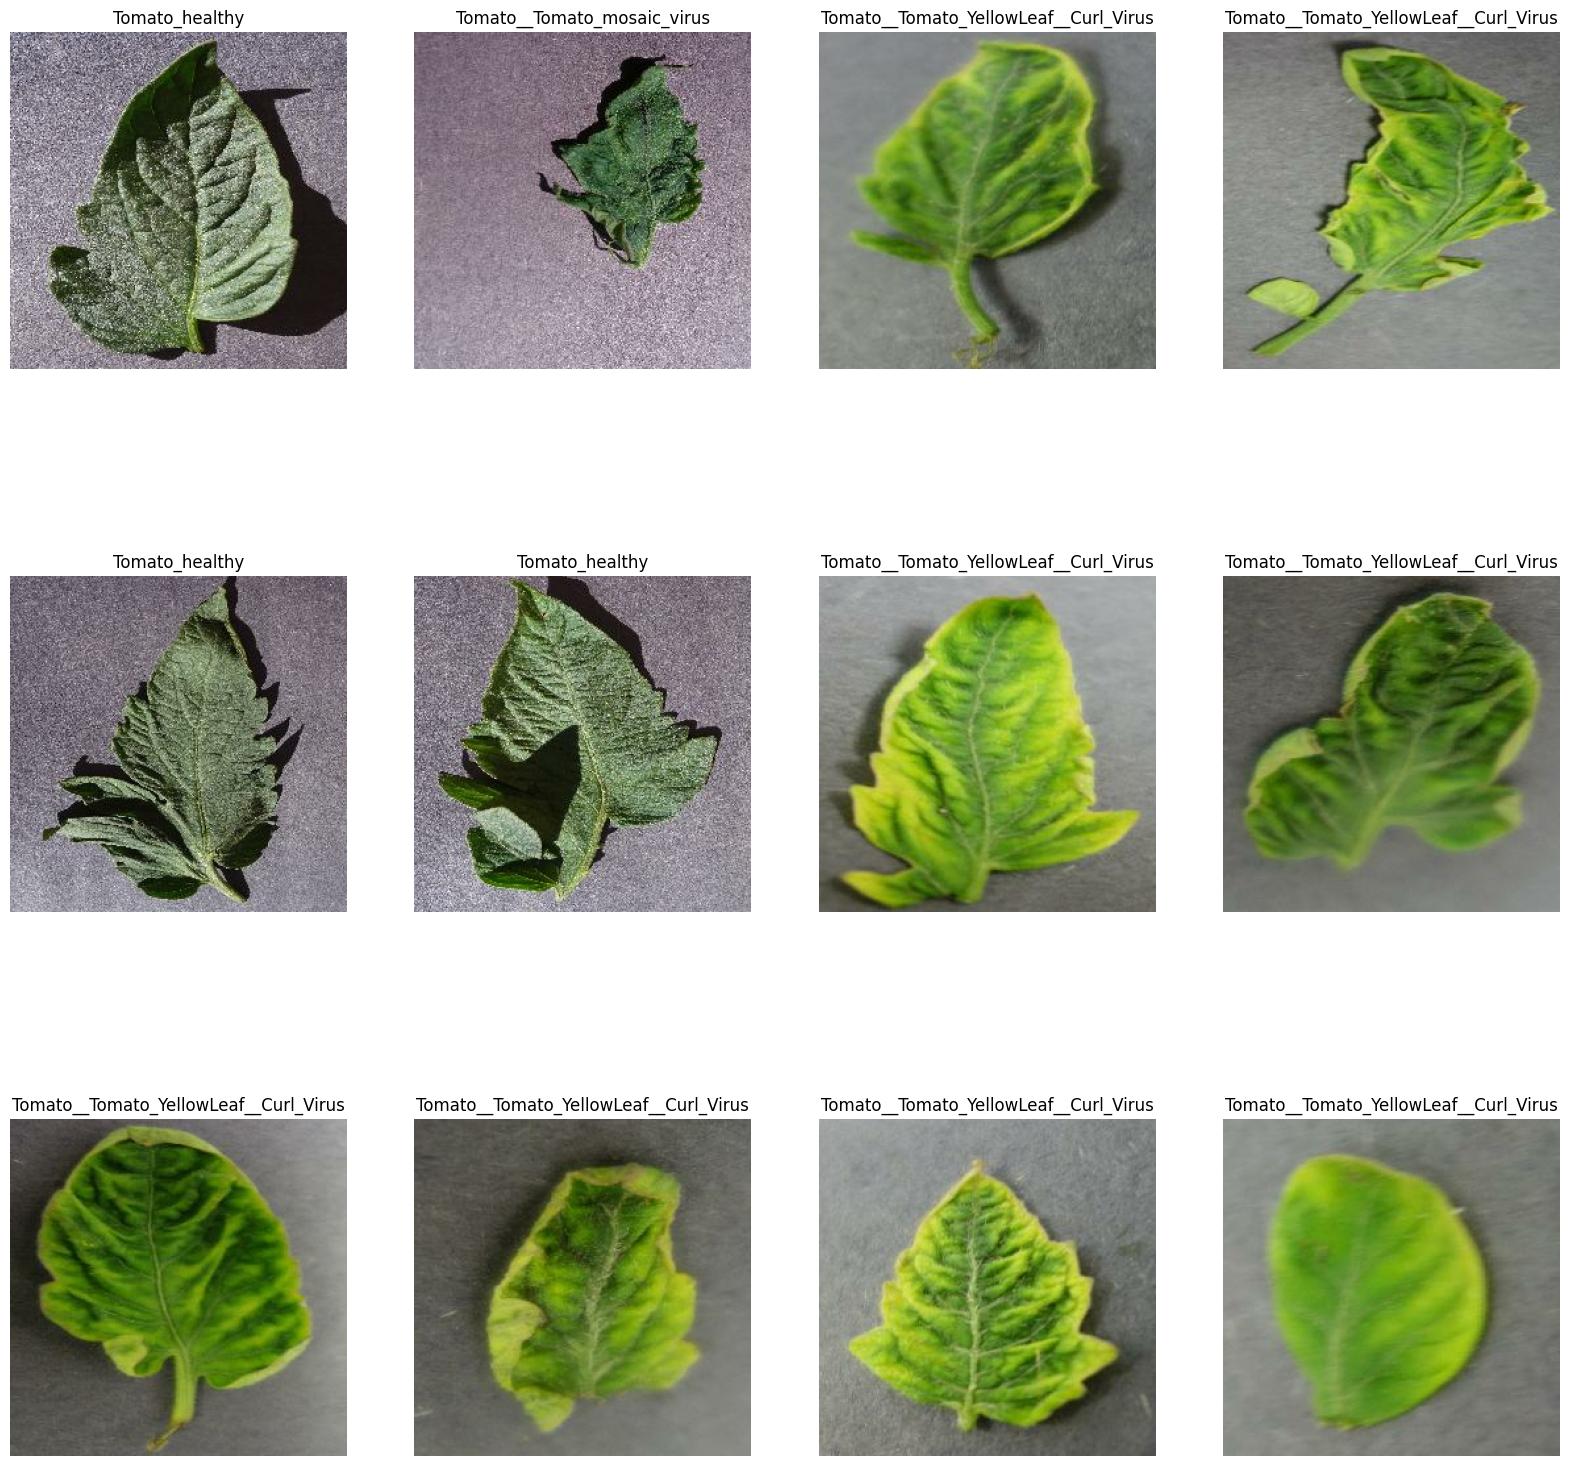

In [8]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
#tomato leaves, tomoto healthy, tomato_yellow_leaf_curl_virus, tomato_mosaic_virus
train_size = 0.8

In [10]:
len(dataset)*train_size

129.6

In [11]:
train_ds = dataset.take(129)

In [12]:
len(train_ds)

129

In [13]:
test_ds = dataset.skip(129)

In [14]:
len(test_ds)

33

In [15]:
val_size = 0.1
len(dataset)*val_size

16.2

In [16]:
val_ds = test_ds.take(16)
len(val_ds)

16

In [17]:
test_ds = test_ds.skip(16)

In [18]:
len(test_ds)

17

In [19]:
len(val_ds)

16

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [21]:
#defining the layers of the model
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape=input_shape)
    

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_data=val_ds)

Epoch 1/50
129/129 [==============================] - 64s 319ms/step - loss: 0.4148 - accuracy: 0.8544 - val_loss: 0.1389 - val_accuracy: 0.9434
Epoch 2/50
129/129 [==============================] - 30s 236ms/step - loss: 0.1596 - accuracy: 0.9431 - val_loss: 0.1967 - val_accuracy: 0.9199
Epoch 3/50
129/129 [==============================] - 31s 237ms/step - loss: 0.1173 - accuracy: 0.9656 - val_loss: 0.1666 - val_accuracy: 0.9531
Epoch 4/50
129/129 [==============================] - 28s 213ms/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0929 - val_accuracy: 0.9707
Epoch 5/50
129/129 [==============================] - 26s 205ms/step - loss: 0.0646 - accuracy: 0.9782 - val_loss: 0.0435 - val_accuracy: 0.9863
Epoch 6/50
129/129 [==============================] - 27s 206ms/step - loss: 0.0367 - accuracy: 0.9872 - val_loss: 0.0561 - val_accuracy: 0.9785
Epoch 7/50
129/129 [==============================] - 26s 202ms/step - loss: 0.0554 - accuracy: 0.9801 - val_loss: 0.1485 - val_ac

In [27]:
history.history['accuracy']

[0.8544089198112488,
 0.943071722984314,
 0.9656007885932922,
 0.9803779125213623,
 0.9781976938247681,
 0.987160861492157,
 0.9801356792449951,
 0.9903100728988647,
 0.9828003644943237,
 0.9835271239280701,
 0.9915212988853455,
 0.9941860437393188,
 0.9929748177528381,
 0.9932170510292053,
 0.9978197813034058,
 0.9987887740135193,
 0.9995155334472656,
 0.9956395626068115,
 0.9842538833618164,
 0.9932170510292053,
 0.996608555316925,
 0.9983042478561401,
 0.992490291595459,
 0.992732584476471,
 0.9963662624359131,
 0.9934592843055725,
 0.9978197813034058,
 0.9992732405662537,
 1.0,
 0.9941860437393188,
 0.9941860437393188,
 0.9963662624359131,
 0.9949128031730652,
 0.9917635917663574,
 0.9987887740135193,
 0.9893410801887512,
 0.9978197813034058,
 0.9995155334472656,
 0.9881298542022705,
 0.9985465407371521,
 0.9995155334472656,
 0.9932170510292053,
 0.9912790656089783,
 0.9987887740135193,
 0.994428277015686,
 0.9975775480270386,
 0.9978197813034058,
 0.9990310072898865,
 0.9963662624

In [28]:
model.evaluate(test_ds)

17/17 [==============================] - 11s 77ms/step - loss: 0.0329 - accuracy: 0.9906


[0.03287136182188988, 0.9906014800071716]

In [29]:
#great accuracy

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


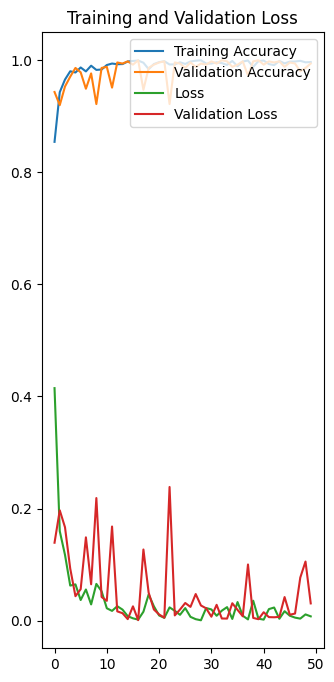

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [32]:
import numpy as np

first image to predict
actual label Tomato_healthy
1/1 [==============================] - 0s 381ms/step
prediction is:  Tomato_healthy


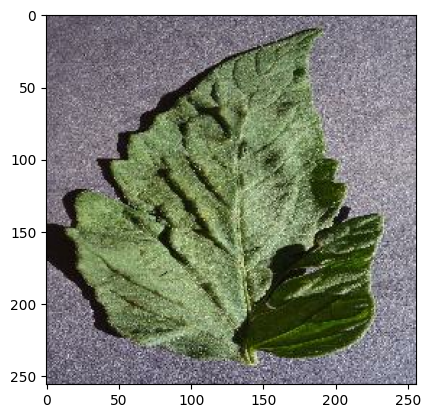

In [33]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("prediction is: ", class_names[np.argmax(batch_prediction[0])])

In [34]:
test_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


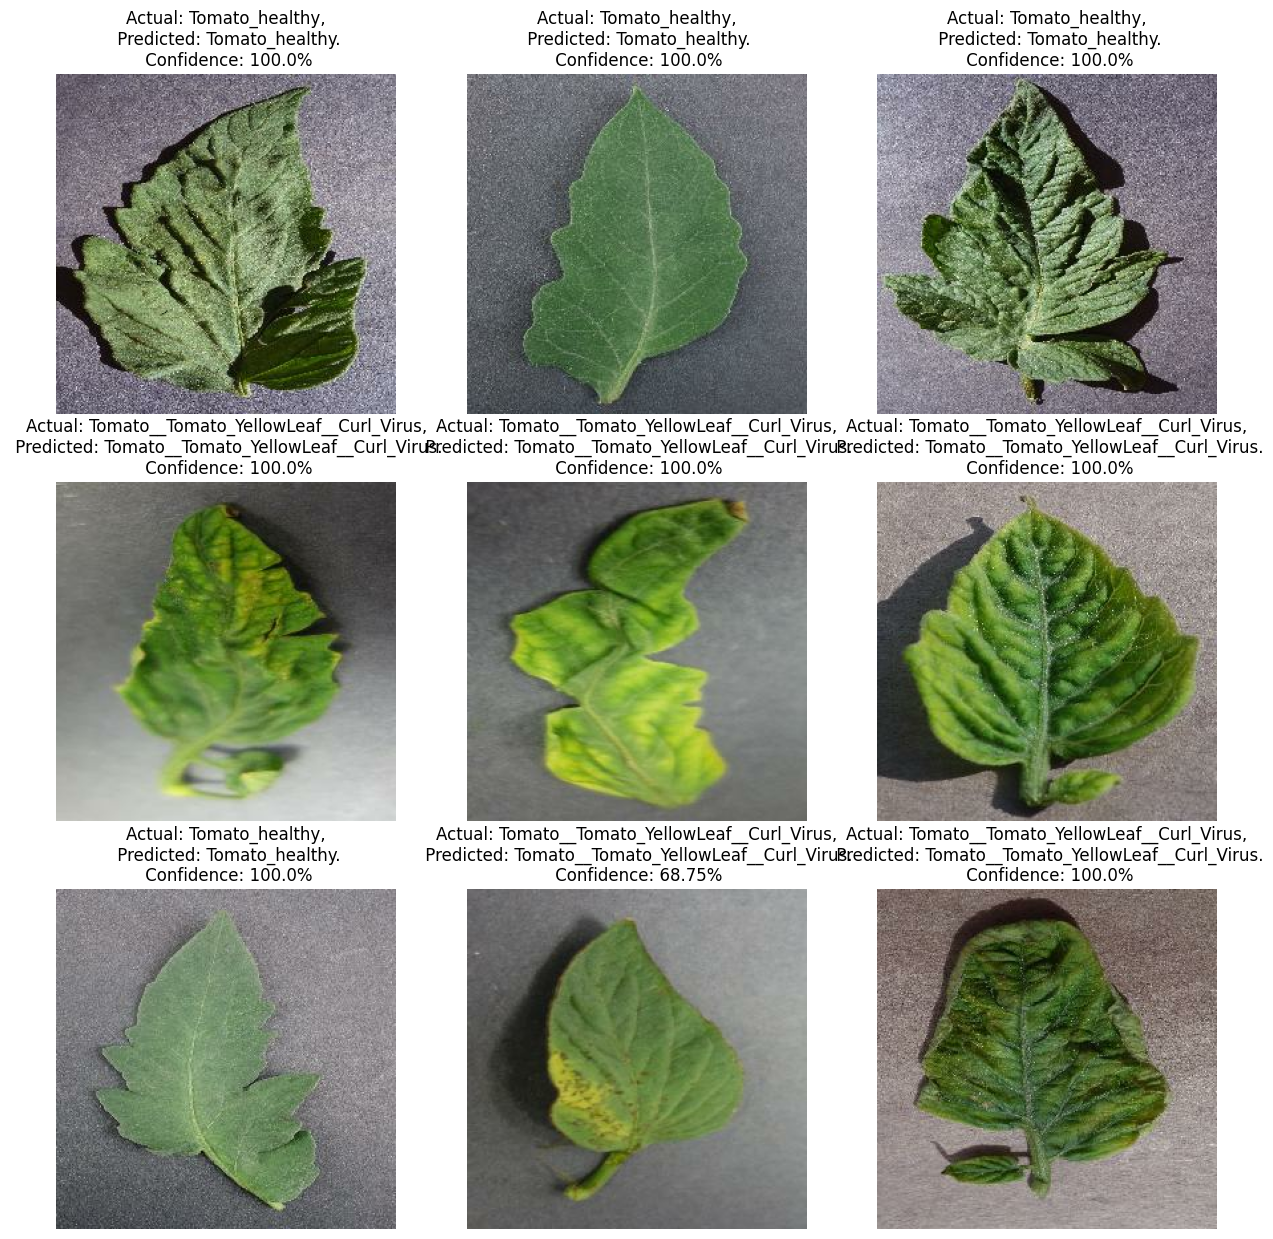

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [41]:
model.save("2.h5", save_format='h5')

In [39]:
pwd

'C:\\Users\\heera\\Mark_1'